In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as spst
import math

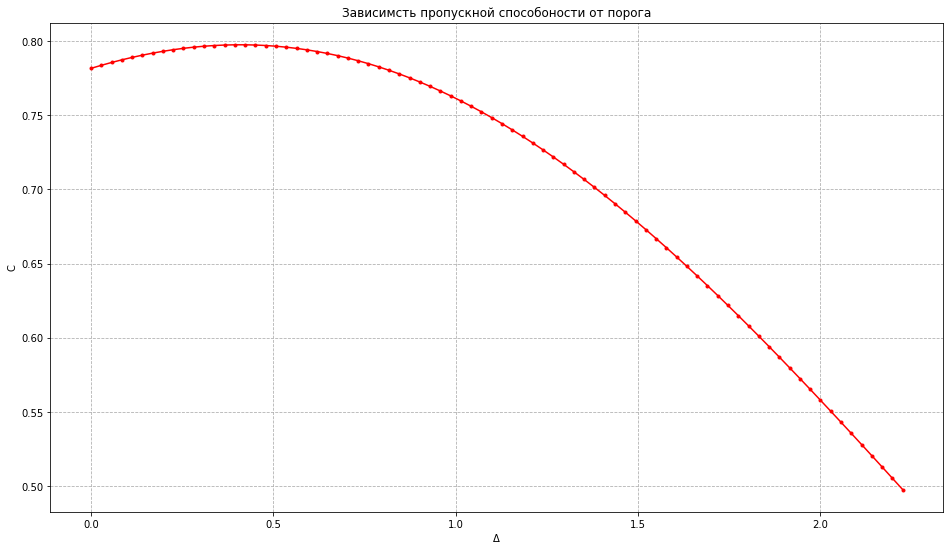

In [12]:
Eb = 5.0
N0 = 4.0

def calc_entropy(x):
    return spst.entropy([x, 1 - x])

def calc_c(p, eps):
    return (1 - eps) * (1 - calc_entropy(p / (1 - eps)))

def calc_p(delta):
    return spst.norm.cdf(-delta, math.sqrt(Eb), math.sqrt(N0 / 2))

def calc_eps(delta):
    return spst.norm.cdf(delta, math.sqrt(Eb), math.sqrt(N0 / 2)) - calc_p(delta)

deltas = list(np.linspace(0, math.sqrt(Eb) - 0.01, 80))
cs = []
for delta in deltas:
    p = calc_p(delta)
    eps = calc_eps(delta)
    cs.append(calc_c(p, eps))
    
plt.figure(figsize=(16, 9))
plt.grid(linestyle='--')
plt.plot(deltas, cs, linestyle='-', marker='.', color='r')
plt.title('Зависимсть пропускной способоности от порога')
plt.xlabel('Δ')
plt.ylabel('C')
plt.show()